# Parallelisation:
Various ways to do this in Python, we went with the in built mltiprocessing module

see: http://spartanideas.msu.edu/2014/06/20/an-introduction-to-parallel-programming-using-pythons-multiprocessing-module/#Multi-Threading-vs.-Multi-Processing

## Multiprocessing:

threading-
passing blocks of code and memory to particular threads and managing memory/data I/O can be a mess as memory is shared in this case

multiprocessing-
passing sub-processes or pseudo-code to a routine that passes/distributes the work for you and is local to the thread on which it gets processed

### map vs. process vs. async:

map: a versatile way to do multiprocessing, less to worry about. sub-code is distributed over avaialble threads and output is returned like you'd expect

process: defines a process or processes that you can iterate over but you have to take care of memory I/O and output issues

async: if you dont care about the order in which your sub-code is processed, use this. the process that gets done first gets returned first, so the order of input is not same as the order of the output and you must use get() to make sense of the output


### MAP

In [16]:
import multiprocessing as mp
import time
import numpy as np

npoints = 5
input_arr = np.random.rand(npoints)

nproc=int(np.floor(npoints/2.))

def makedistance(i):
    output_arr = i**i
    return output_arr

t1 = time.time()

pool = mp.Pool(processes=nproc)
out = pool.map(makedistance, input_arr)
pool.close()
pool.join()
print out
t2 = time.time()

print t2 - t1

[0.73635058179142943, 0.94900106298500042, 0.69640311623400675, 0.82019004614833346, 0.85999771400029101]
0.124585151672


### ASYNC:
call the get method to order your output

In [17]:
import multiprocessing as mp
from multiprocessing import Pool
import time
import numpy as np

npoints = 10
input_arr = np.arange(0,npoints)

nproc=int(np.floor(npoints/2.))

def makedistance(i):
    output_arr = i*i
    return output_arr

t1 = time.time()

p = Pool(processes=nproc)
results = p.apply_async(makedistance, args=(input_arr,))
results_out = results.get()
print results_out

t2 = time.time()
print t2 - t1

[ 0  1  4  9 16 25 36 49 64 81]
0.0220420360565


## Process:

note how the output is returned

In [18]:
import multiprocessing as mp
from multiprocessing import Pool
import time
import numpy as np

npoints = 10
input_arr = np.arange(0,npoints)

nproc=int(np.floor(npoints/2.))

output = mp.Queue()

def makedistance(i,output):
    output_arr = i*i
    output.put(output_arr)

t1 = time.time()

procs = mp.Process(target=makedistance, args=(input_arr,output))
 
procs.start()
procs.join()
results = [output.get()]
print results

t2 = time.time()
print t2 - t1

[array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])]
0.0228469371796


# Problem: 
in a sample of n haloes, compute the distance of all haloes from all other haloes 

## Algorithms:
scipy vs Numba vs 'pure for loop'

scipy and Numbda are close and as expected, the pure for loop is excruciatingly slow

We went with scipy, just because.

Of course one also can do this in C or Cython.

https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/

Below is the graph of how we could present their scaling statistics


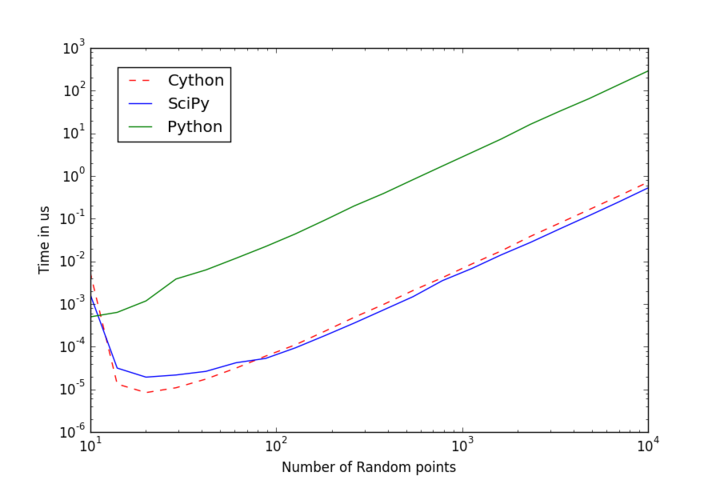

In [20]:
from IPython.display import Image
Image('distances_720.png')

## Python

### Chunking vs. multiprocessing

### chunking
Chunking is where we divide the operation into sub processes and pass those to be multiprocessed individually. this works great but as one can expect, in the long run with larger data sets, memory allocation will be a problem as even after division, there wont be enough memory to hold these processes and the code could crash

### multiprocessing workers

Here we let the array be sort of static in the memory and pass several workers that are essentially each enrty of the array to be worked upon one at a time. this could be slow but in the long run, better with memory allocation

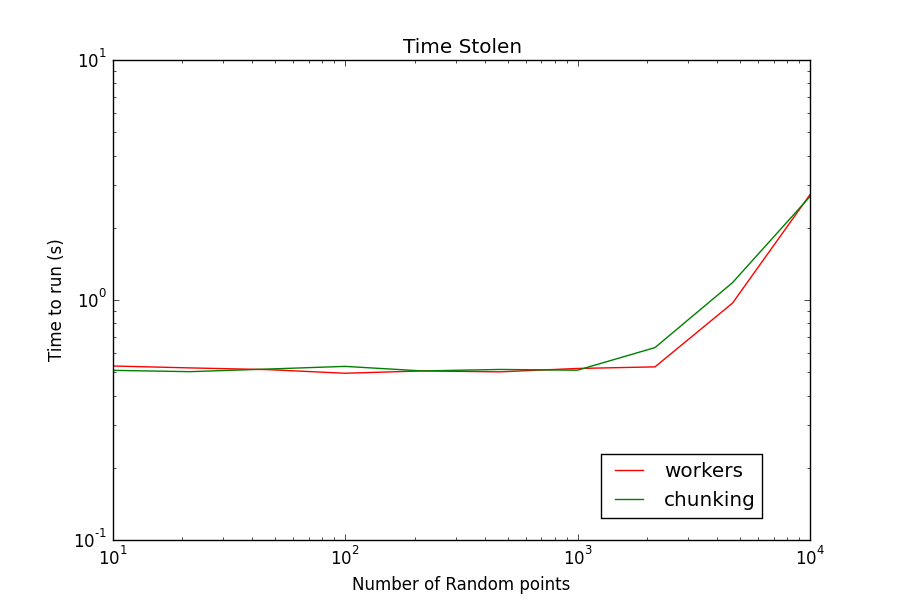

In [3]:
from IPython.display import Image
Image(filename='time.png')

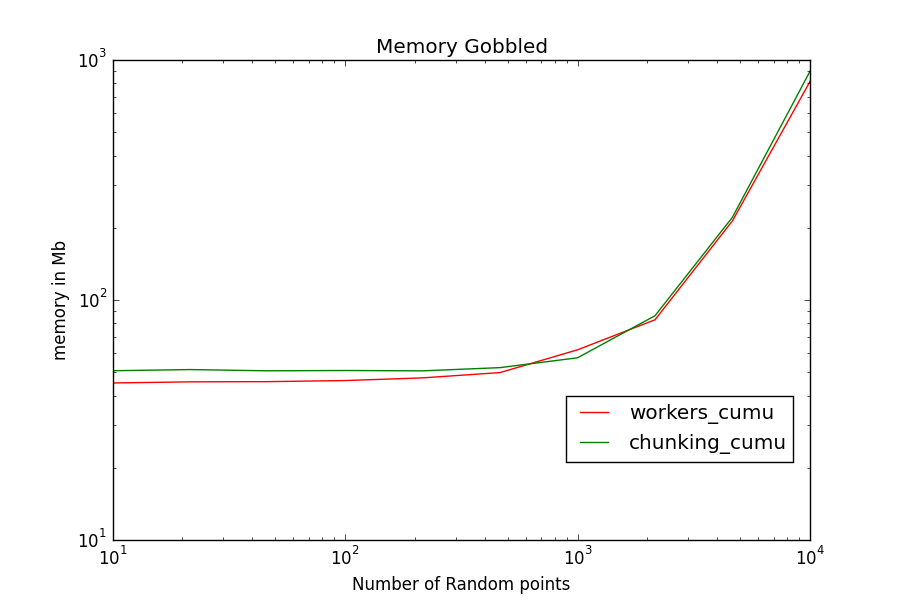

In [4]:
from IPython.display import Image
Image(filename='memory.png')